In [1]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


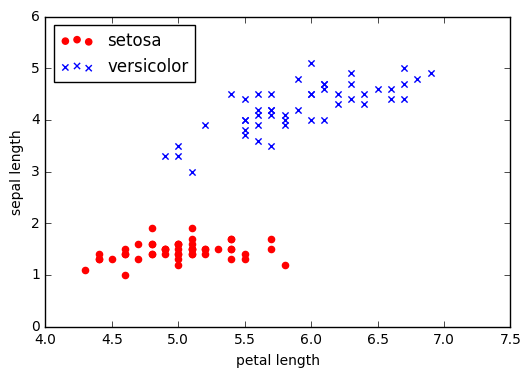

In [43]:
import matplotlib.pyplot as plt
import numpy as np

# to get 4rth column value for first 100 rows
y = df.iloc[0:100, 4].values
y = np.where(y== 'Iris-setosa', -1, 1)

# take sepal length & petal length columns (0th & 2nd)
X = df.iloc[0:100, [0,2]].values

plt.scatter(X[:50, 0], X[:50, 1],color='red', marker='o', label='setosa')
plt.scatter(X[51:100, 0], X[51:100, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.legend(loc='upper left')
plt.show()

[2, 2, 3, 2, 1, 0, 0, 0, 0, 0]
[3, 0, 0, 0, 0, 0, 0, 0, 0, 0]


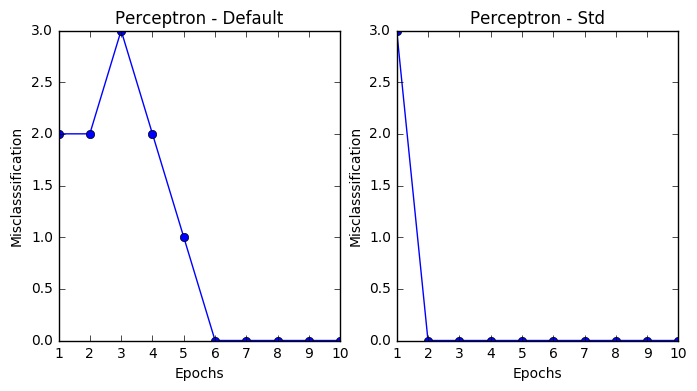

In [90]:
###########################################################################################
# PERCEPTRON OR GD (Gradient descent): Default VS Normalized X.
###########################################################################################

%run 'Perceptron.ipynb'
ppn = Perceptron(eta=0.01, n_iter=10)
ppn.fit(X,y)
print (ppn.errors_)

X_std = np.copy(X)
X_std[:,0] = (X_std[:,0] - X_std[:,0].mean())/X_std[:,0].std()
X_std[:,1] = (X_std[:,1] - X_std[:,1].mean())/X_std[:,1].std()
ppn_std = Perceptron(eta=0.01, n_iter=10)
ppn_std.fit(X_std,y)
print (ppn_std.errors_)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
ax[0].plot(range(1, len(ppn.errors_)+1), ppn.errors_, marker='o', color='blue')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Misclasssification')
ax[0].set_title('Perceptron - Default')

ax[1].plot(range(1, len(ppn_std.errors_)+1), ppn_std.errors_, marker='o', color='blue')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Misclasssification')
ax[1].set_title('Perceptron - Std')

# plt.xlabel('Epochs')
# plt.ylabel('Misclasssification Errors')
plt.show()


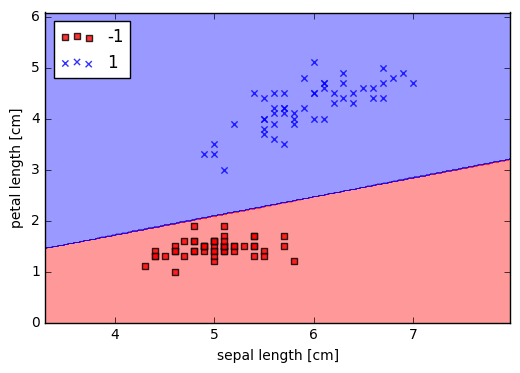

In [53]:
###########################################################################################
# PLOT DECISION REGION
###########################################################################################

%run 'plot_decision_regions.ipynb'
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()



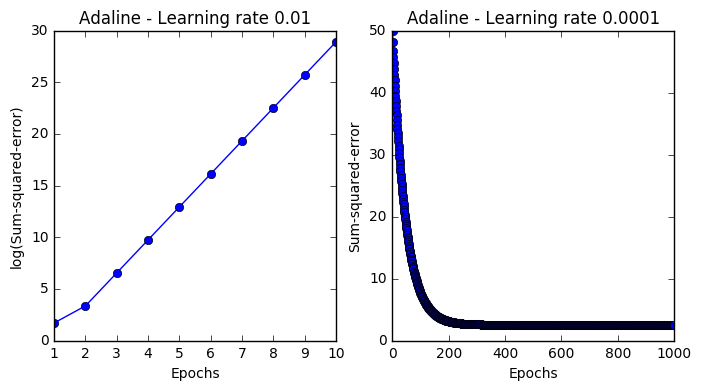

In [115]:
###########################################################################################
# ADALINE GD: Batch gradient descent. It doesnt converge at 0.01 learning rate.
###########################################################################################

%run 'AdalineGD.ipynb'
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')
ada2 = AdalineGD(n_iter=1000, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')
plt.show()

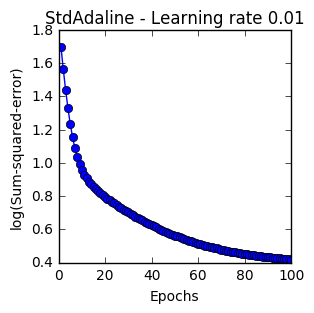

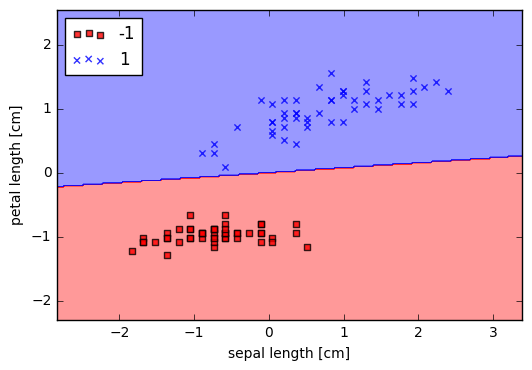

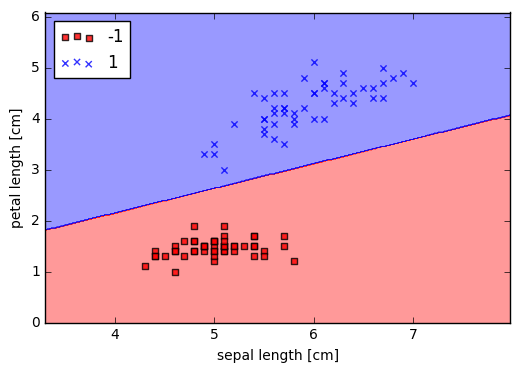

In [116]:
###########################################################################################
# ADALINE GD: normalize X and fit. Now it'll converge for eta=0.01. Also, decision boundary 
# is incorrect for AdalineGD with X. See below decision boundary plots with X (VS) X-std.
# Q&A: note that SSE remains non-zero even though all samples were classified correctly. why?
# Q&A: check below decision-boundary plots. why is it so bad for X?
###########################################################################################
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()
ada_std = AdalineGD(n_iter=100, eta=0.001).fit(X_std, y)
plt.figure(figsize=(3, 3))
plt.plot(range(1, len(ada_std.cost_) + 1), np.log10(ada_std.cost_), marker='o')
plt.xlabel('Epochs')
plt.ylabel('log(Sum-squared-error)')
plt.title('StdAdaline - Learning rate 0.01')
plt.show()

plot_decision_regions(X_std, y, classifier=ada_std)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

plot_decision_regions(X, y, classifier=ada2)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()